In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [56]:
bids = pd.read_csv('data/bids.csv', sep=',')
print('bids imported ({})'.format(bids.shape))
bids.head()

bids imported ((7656334, 9))


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [8]:
bids = pd.read_csv('data/bids_normalized.csv', sep=',')
print('bids imported ({})'.format(bids.shape))
bids.head()

bids imported ((7656334, 9))


,bid_id,bidder_id,auction,device,country,ip,url,time_normalized,outcome
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,phone0,us,69.166.231.58,vasstdc27m7nks3,2419200.0,NaN
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,phone1,in,50.201.125.84,jmqlhflrzwuay9c,2419200.0,0.0
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,phone2,py,112.54.208.157,vasstdc27m7nks3,2419200.0,NaN
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,phone4,in,18.99.175.133,vasstdc27m7nks3,2419200.0,NaN
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,phone5,in,145.138.5.37,vasstdc27m7nks3,2419200.0,NaN


In [9]:
b_train = pd.read_csv('data/b_train.csv', sep=',')
print('b_train imported ({})'.format(b_train.shape))
b_train.head()

b_train imported ((2013, 6))


,bidder_id,outcome,mean_time_diff,total_bids_count,total_auctions_count,mean_time_diff2
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24,18,10673.375000
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3,1,2.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4,4,219.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1,1,330.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155,23,35.206452


In [10]:
b_test = pd.read_csv('data/b_test.csv', sep=',')
print('b_test imported ({})'.format(b_test.shape))
b_test.head()

b_test imported ((4700, 4))


,bidder_id,mean_time_diff,total_bids_count,total_auctions_count
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,444750.00000,4,3
1,a921612b85a1494456e74c09393ccb65ylp4y,722019.50000,3,2
2,6b601e72a4d264dab9ace9d7b229b47479v6i,345.62500,17,14
3,eaf0ed0afc9689779417274b4791726cn5udi,9890.55102,148,90
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,5678.22727,23,20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30b25be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cdda2b0>]], dtype=object)

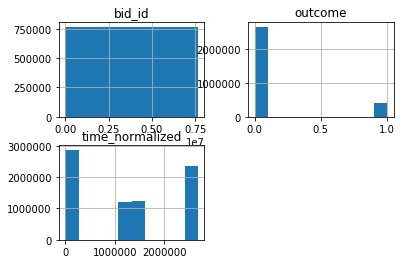

In [11]:
bids.hist()

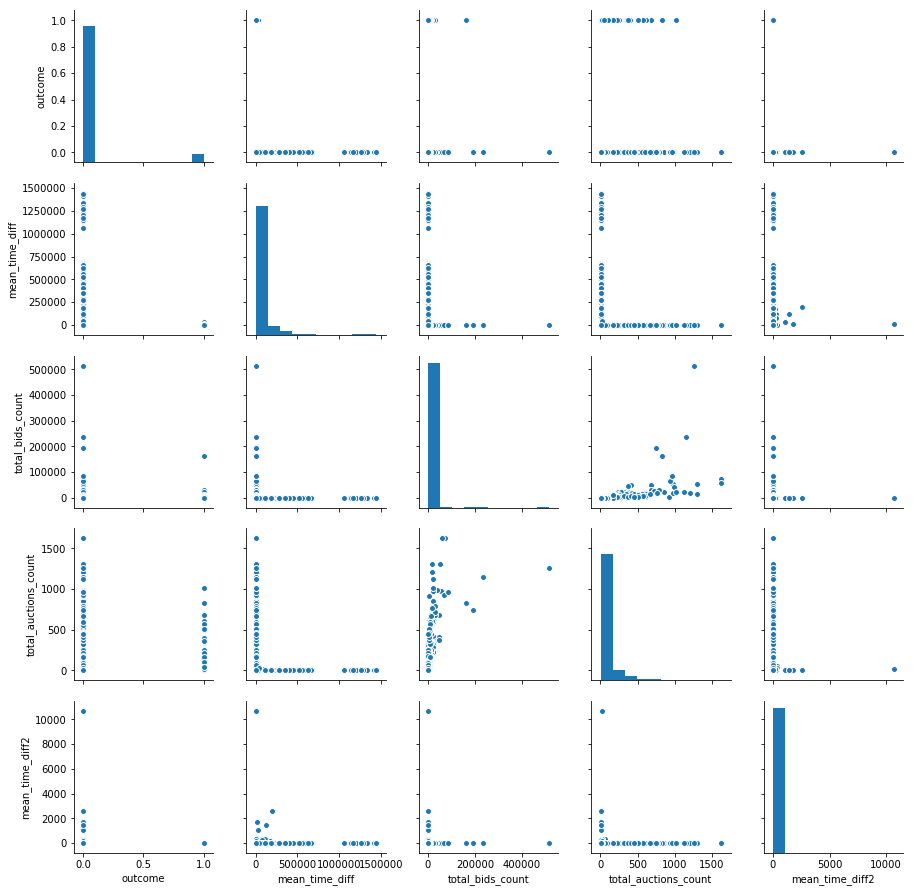

In [14]:
sns.pairplot(b_train.dropna())

In [12]:
b_train.corr()

,outcome,mean_time_diff,total_bids_count,total_auctions_count,mean_time_diff2
outcome,1.000000,-0.095861,0.039439,0.132223,-0.009227
mean_time_diff,-0.095861,1.000000,-0.044562,-0.168219,-0.003067
total_bids_count,0.039439,-0.044562,1.000000,0.503099,-0.004161
total_auctions_count,0.132223,-0.168219,0.503099,1.000000,-0.013489
mean_time_diff2,-0.009227,-0.003067,-0.004161,-0.013489,1.000000


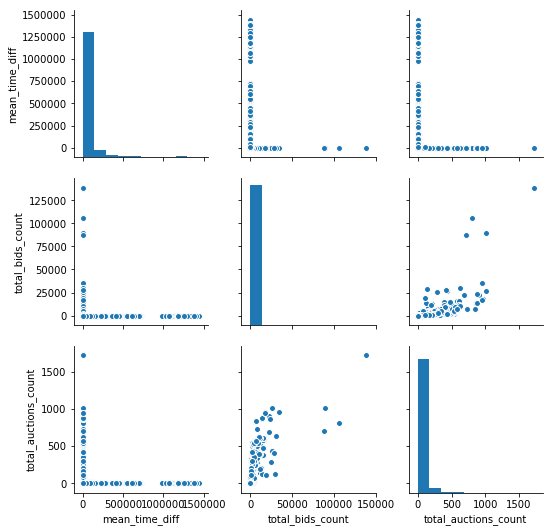

In [14]:
sns.pairplot(b_test.dropna())

In [13]:
b_test.corr()

,mean_time_diff,total_bids_count,total_auctions_count
mean_time_diff,1.000000,-0.042859,-0.106240
total_bids_count,-0.042859,1.000000,0.670199
total_auctions_count,-0.106240,0.670199,1.000000


# one bidder activity

In [18]:
activity = bids[bids.bidder_id=='668d393e858e8126275433046bbd35c6tywop']

### bids / timestamp

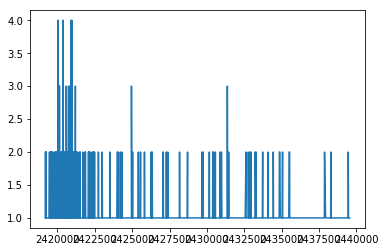

In [52]:
time = np.array(activity.time_normalized.unique())
bids_count = np.array(activity.time_normalized.groupby(activity.time_normalized).count())
cut = 2000
plt.plot(time[:cut], bids_count[:cut])

(array([  1.79910000e+04,   0.00000000e+00,   0.00000000e+00,
          9.17000000e+02,   0.00000000e+00,   0.00000000e+00,
          4.90000000e+01,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+00]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

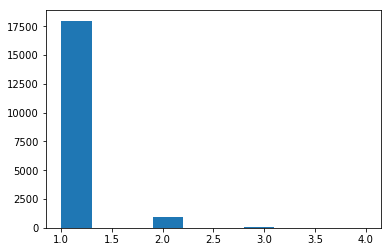

In [54]:
plt.hist(bids_count)

In [ ]:
activity.bid_id.hist()